SVM Kernels 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

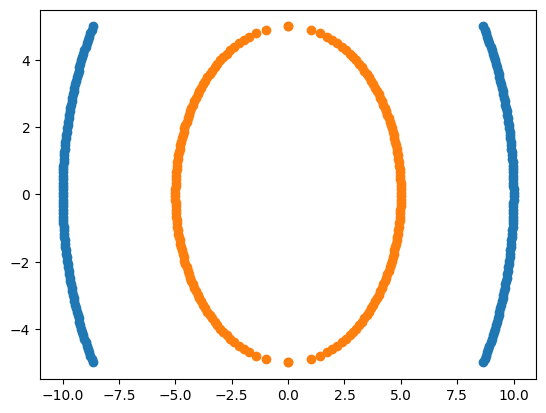

In [4]:
plt.scatter(y,x)
plt.scatter(y1, x1)

In [8]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', 'X2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [9]:
## Independent & Dependent feature
X=df.iloc[:, :2]
y=df.Y

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [11]:
## split the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [12]:
y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [13]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

In [16]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [17]:
## we need to find components for the Polynomial Kernel
## X1, X2, X1_square,, X2_square, X1*X2

df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [18]:
## Independent and Dependent features
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [21]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [22]:
y_train

250    1
63     0
312    1
159    0
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [23]:
X_test

,X1,X2,X1_Square,X2_Square,X1*X2
132,-9.842526,1.767677,96.875319,3.124681,-17.398405
309,-2.874798,4.090909,8.264463,16.735537,-11.760537
341,-4.925731,0.858586,24.262830,0.737170,-4.229163
196,-8.828277,-4.696970,77.938476,22.061524,41.466150
246,4.987486,-0.353535,24.875013,0.124987,-1.763252
...,...,...,...,...,...
146,-9.993749,0.353535,99.875013,0.124987,-3.533143
135,-9.892159,1.464646,97.854811,2.145189,-14.488516
390,-2.874798,-4.090909,8.264463,16.735537,11.760537
264,4.780671,1.464646,22.854811,2.145189,7.001992


In [24]:
y_test

132    0
309    1
341    1
196    0
246    1
      ..
146    0
135    0
390    1
264    1
364    1
Name: Y, Length: 100, dtype: int64

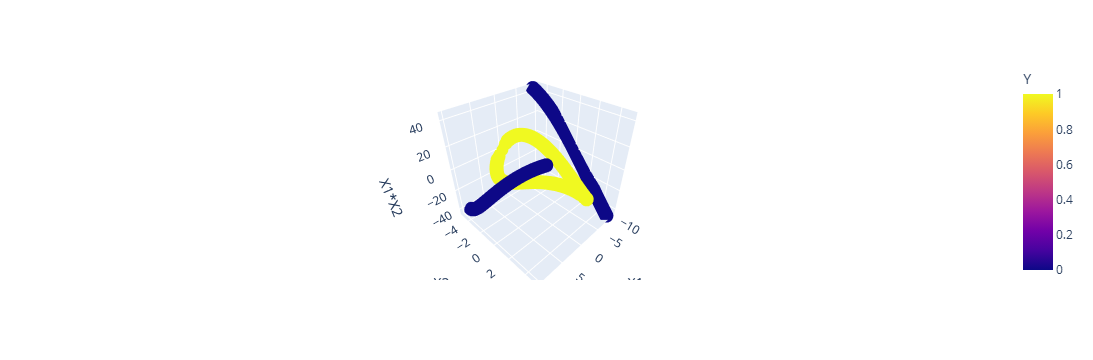

In [26]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

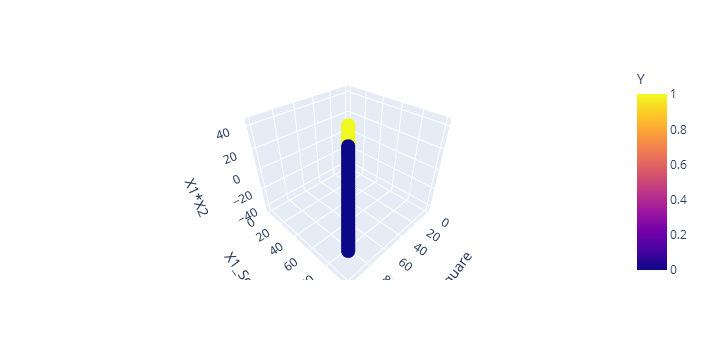

In [30]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [28]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['X1','X2']])

In [32]:
from sklearn.svm import SVC

clf_poly = SVC(kernel='linear')
clf_poly.fit(X_poly, df['Y'])

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


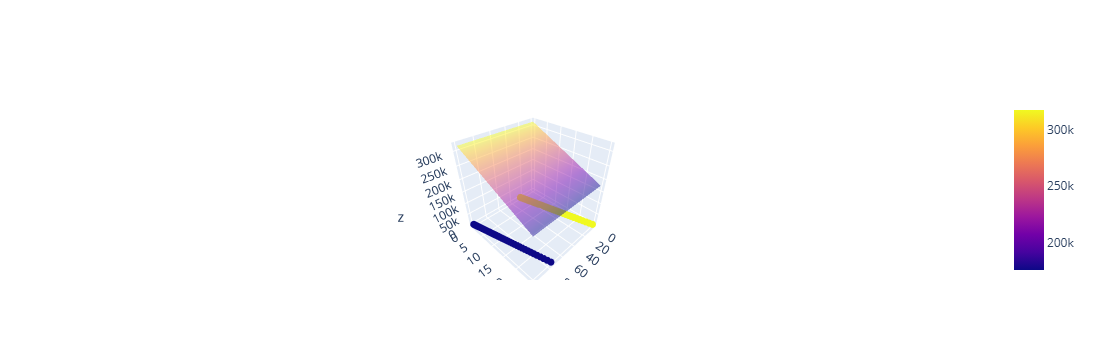

In [33]:
import numpy as np
import plotly.graph_objects as go

# Create mesh grid
x1_sq = np.linspace(df['X1_Square'].min(), df['X1_Square'].max(), 20)
x2_sq = np.linspace(df['X2_Square'].min(), df['X2_Square'].max(), 20)
x1_sq, x2_sq = np.meshgrid(x1_sq, x2_sq)

# Decision plane equation: w1*x + w2*y + w3*z + b = 0
w = clf_poly.coef_[0]
b = clf_poly.intercept_[0]

z = (-w[2]*x1_sq - w[3]*x2_sq - b) / w[4]

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['X1_Square'],
    y=df['X2_Square'],
    z=df['X1*X2'],
    mode='markers',
    marker=dict(color=df['Y'], size=4)
))

fig.add_trace(go.Surface(
    x=x1_sq,
    y=x2_sq,
    z=z,
    opacity=0.5
))

fig.show()


In [34]:
##Linear SVM learns a straight-line boundary, while Polynomial SVM maps data into higher dimensions where a linear plane corresponds to a curved boundary in the original space.